<a href="https://colab.research.google.com/github/sonalikaus/Unsupervised-Capstone-Project/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## Libraries

In [1]:
# Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt

import warnings
warnings.filterwarnings("ignore")

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA


## Import Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NETFLIX PROJECT/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

## First Look Of Dataset

In [4]:
# First Five Observations
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# Last Five Observations
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
# Basic Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
# Statistical Info
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [8]:
# Dataset's Shape
df.shape

(7787, 12)

In [9]:
# Dataset's Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Datatype of given columns
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [11]:
# Checking duplicated entries.
df.duplicated().sum()

0

In [12]:
# Percentage of null values.
for col in df.columns:
  null_rate = df[col].isnull().sum() / len(df) * 100
  if null_rate > 0:
    print(f'Percentage of null values in {col} : {null_rate}%')

Percentage of null values in director : 30.679337357133683%
Percentage of null values in cast : 9.220495697958135%
Percentage of null values in country : 6.51085141903172%
Percentage of null values in date_added : 0.1284191601386927%
Percentage of null values in rating : 0.08989341209708489%


**Null values are present in director, cast, country, date_added, and rating.Since there are very few null values present in date_added and rating we will remove them from the data.**

## Handling Null Values

In [13]:
# Number of null values in date_added.
df.date_added.isnull().sum()

10

In [14]:
# Number of null values in rating.
df.rating.isnull().sum()

7

In [15]:
# Removing null values in date_added and rating
df.dropna(subset=['date_added'], inplace=True)
df.dropna(subset=['rating'], inplace=True)

In [16]:
# Replacing null values in director
df['director']= df['director'].fillna('')

In [17]:
# Replacing null values in cast
df['cast']= df['cast'].fillna('')

In [18]:
# Null values in Country
country_null_values = df.country.isnull().sum()
print(f'We had observed that variable country had {country_null_values} null values in it, we will replace these null values with the most occurring country which is United States.')

We had observed that variable country had 505 null values in it, we will replace these null values with the most occurring country which is United States.


In [19]:
# Replacing null values in country with the most occuring one
df['country'].fillna('United States', inplace=True)

## Feature Engineering

## date_added column

In [20]:
# Converting date_added into datetime format
df["date_added"]= pd.to_datetime(df['date_added'], dayfirst=True, errors = 'coerce')

In [21]:
# Creating new features to store day, month and year seperately.
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

## listed_in Column

**Genres are extracted and re-defined accordingly. TV and Movie genres are separately defined.Topics like International TV Shows are removed as it could bring in a bias by displaying content in reference to American movies.**

In [22]:
a = df.copy()

In [23]:
a['listed_in'] = a.listed_in.apply(lambda row: row.split(', '))
a.explode('listed_in')['listed_in'].unique()

array(['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy',
       'Dramas', 'International Movies', 'Horror Movies',
       'Action & Adventure', 'Independent Movies', 'Sci-Fi & Fantasy',
       'TV Mysteries', 'Thrillers', 'Crime TV Shows', 'Docuseries',
       'Documentaries', 'Sports Movies', 'Comedies', 'Anime Series',
       'Reality TV', 'TV Comedies', 'Romantic Movies',
       'Romantic TV Shows', 'Science & Nature TV', 'Movies',
       'British TV Shows', 'Korean TV Shows', 'Music & Musicals',
       'LGBTQ Movies', 'Faith & Spirituality', "Kids' TV",
       'TV Action & Adventure', 'Spanish-Language TV Shows',
       'Children & Family Movies', 'TV Shows', 'Classic Movies',
       'Cult Movies', 'TV Horror', 'Stand-Up Comedy & Talk Shows',
       'Teen TV Shows', 'Stand-Up Comedy', 'Anime Features',
       'TV Thrillers', 'Classic & Cult TV'], dtype=object)

In [24]:
renaming_genre = {'International TV Shows': '-','TV Dramas': 'Drama','TV Sci-Fi & Fantasy': 'SciFiFantasy','Dramas': 'Drama' ,'International Movies': '-','Horror Movies': 'Horror','Action & Adventure': 'ActionAdventure',
'Independent Movies': '-','Sci-Fi & Fantasy': 'SciFiFantasy','TV Mysteries': 'Mystery','Thrillers': 'Thriller','Crime TV Shows': 'Crime','Docuseries': 'Documentary','Documentaries': 'Documentary', 'Sports Movies': 'Sports','Comedies':'Comedy','Anime Series': 'Anime','Reality TV': 'Reality','TV Comedies': 'Comedy','Romantic Movies': 'Romance',
'Romantic TV Shows': 'Romance', 'Science & Nature TV': 'Science','Movies': '-','British TV Shows': '-','Korean TV Shows': '-','Music & Musicals': 'Music','LGBTQ Movies': 'LGBTQ',
'Faith & Spirituality': 'Spirituality',  "Kids' TV": 'Kids','TV Action & Adventure': 'ActionAdventure','Spanish-Language TV Shows': '-','Children & Family Movies': 'Family', 'TV Shows': '-',
'Classic Movies': 'Classic','Cult Movies': 'Cult','TV Horror': 'Horror','Stand-Up Comedy & Talk Shows':'Comedy, TalkShow','Teen TV Shows': 'Teen', 'Stand-Up Comedy':'Comedy', 'Anime Features':'Anime',
'TV Thrillers': 'Thriller','Classic & Cult TV':'Classic, Cult'}

In [25]:
def genre_replace(row, renaming_genre = renaming_genre):
  new_text = []
 
  for word in (row['listed_in']):
    if word in renaming_genre:
      if '-' not in renaming_genre[word]:
       new_text.append(renaming_genre[word])
    else:
      print(word, 'not present in dictionary')

  return(', '.join(new_text))
  

df['Genres'] = a.apply(lambda row: genre_replace(row),axis=1)
df['Genres'] = df['Genres'].apply(lambda row: row.split(', '))

In [26]:
(df.explode('Genres')['Genres'].unique())

array(['Drama', 'SciFiFantasy', 'Horror', 'ActionAdventure', 'Mystery',
       'Thriller', 'Crime', 'Documentary', 'Sports', 'Comedy', 'Anime',
       'Reality', 'Romance', 'Science', '', 'Music', 'LGBTQ',
       'Spirituality', 'Kids', 'Family', 'Classic', 'Cult', 'TalkShow',
       'Teen'], dtype=object)

In [27]:
df['Genres']

0                 [Drama, SciFiFantasy]
1                               [Drama]
2                              [Horror]
3       [ActionAdventure, SciFiFantasy]
4                               [Drama]
                     ...               
7782                            [Drama]
7783                     [Drama, Music]
7784               [Documentary, Music]
7785                          [Reality]
7786               [Documentary, Music]
Name: Genres, Length: 7770, dtype: object

## **1**. **Exploratory Data Analysis**

##Content type on Netflix

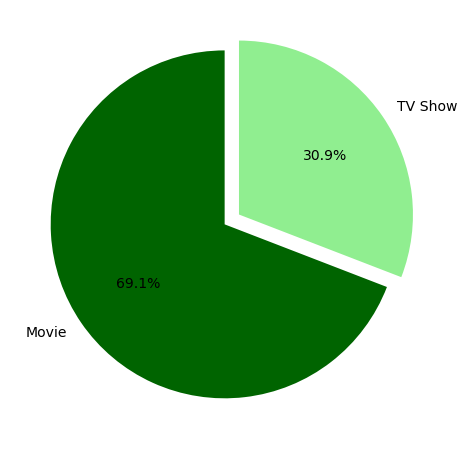

In [28]:
# pie chart Size
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = df['type'].value_counts().index.tolist()

# Convert value counts to list
sizes = df['type'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart 
colors = ['darkgreen', 'lightgreen']


plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

**69.1% of the content available on Netflix are movies and remaining 30.9% are TV Shows.**

##Content growth over the years

In [29]:
pip install --upgrade "kaleido==0.1.*"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


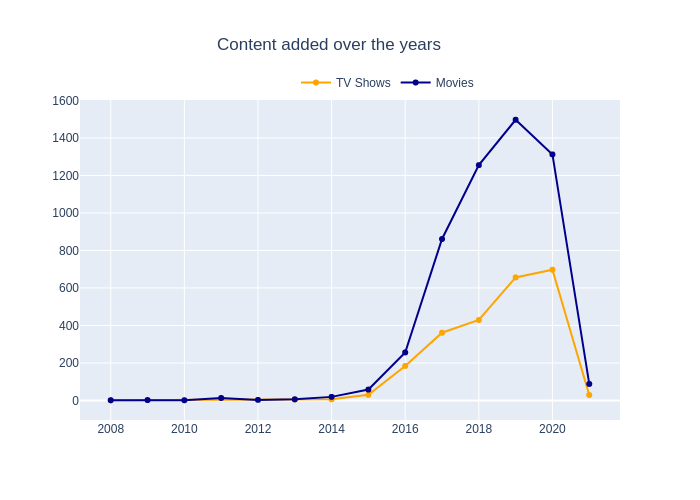

In [30]:
# Plot growth of the contents over the years.
tv_show = df[df["type"] == "TV Show"]
movie = df[df["type"] == "Movie"]

col = "year_added"

content_1 = tv_show[col].value_counts().reset_index()
content_1 = content_1.rename(columns = {col : "count", "index" : col})
content_1 = content_1.sort_values(col)

content_2 = movie[col].value_counts().reset_index()
content_2 = content_2.rename(columns = {col : "count", "index" : col})
content_2 = content_2.sort_values(col)

trace1 = go.Scatter(x=content_1[col], y=content_1["count"], name="TV Shows", marker=dict(color="orange"))
trace2 = go.Scatter(x=content_2[col], y=content_2["count"], name="Movies", marker=dict(color="darkblue"))

data = [trace1, trace2]
layout = go.Layout(title="Content added over the years",title_x=0.47, legend=dict(x=0.4, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)


fig.show('png')


**Given Line Plot shows, growth in the number of movies on Netflix is much higher than tv shows.**

**From 2015 we can see a noticeable growth in the number of movies and tv shows uploaded by Netflix on its platform**.

**The highest number of movies and tv shows got added in 2019 and 2020**.

**Also, very few movies and tv shows got added in 2021**.

 

##In which month do most movies and tv shows get added?

In [31]:
# Dataframe to store month values and counts.
months_df = pd.DataFrame(df.month_added.value_counts())
months_df.reset_index(inplace=True)
months_df.rename(columns={'index':'month', 'month_added':'count'}, inplace=True)

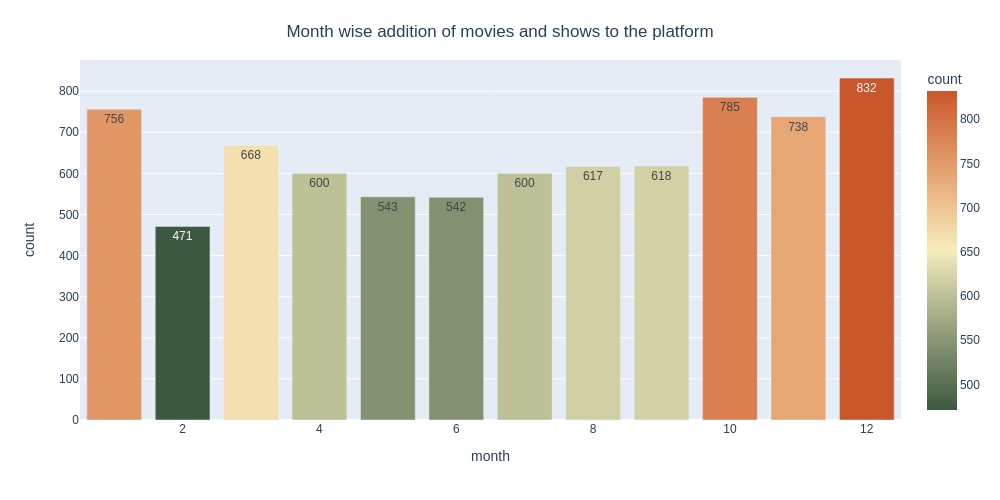

In [32]:
#Let's get the plot
fig = px.bar(months_df, x="month", y="count", text_auto=True, color='count',color_continuous_scale='fall')
fig.update_layout(title={'text': 'Month wise addition of movies and shows to the platform','y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'},
autosize=False,width=1000,height=500)
fig.show('png')


**Most of the content is uploaded either by year ending or beginning.**

**October, November, December, and January are months in which many shows and movies get uploaded to the platform.**

**It might be due to the winter, as in these months people may stay at home and watch shows and movies in their free time.**

##Which days are more prominent?

In [33]:
# Dataframe to store day values and count.
days_df = pd.DataFrame(df.day_added.value_counts())
days_df.reset_index(inplace=True)
days_df.rename(columns={'index':'day', 'day_added':'count'}, inplace=True)

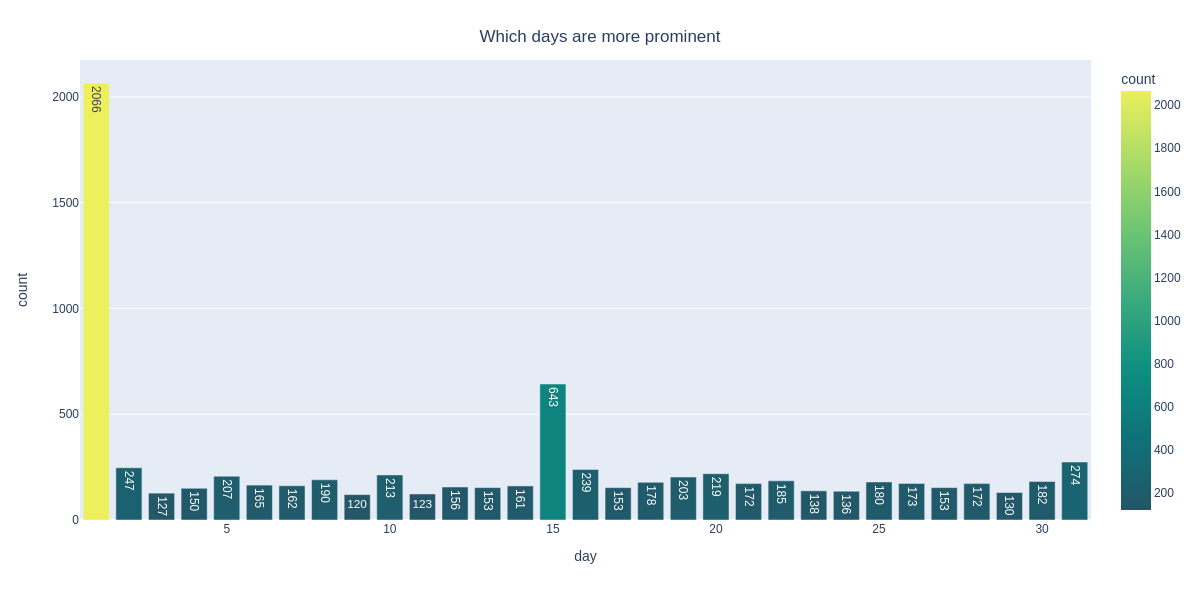

In [34]:
#Let's get the plot
fig = px.bar(days_df, x="day", y="count", text_auto=True, color='count', color_continuous_scale='aggrnyl')
fig.update_layout(title={'text': 'Which days are more prominent','y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'},autosize=False,width=1200,
height=600)
# fig.show()
fig.show('png')

 **Most of the content gets uploaded in the beginning and the middle of the month.**

##Top 10 Countries that produced content on Netflix

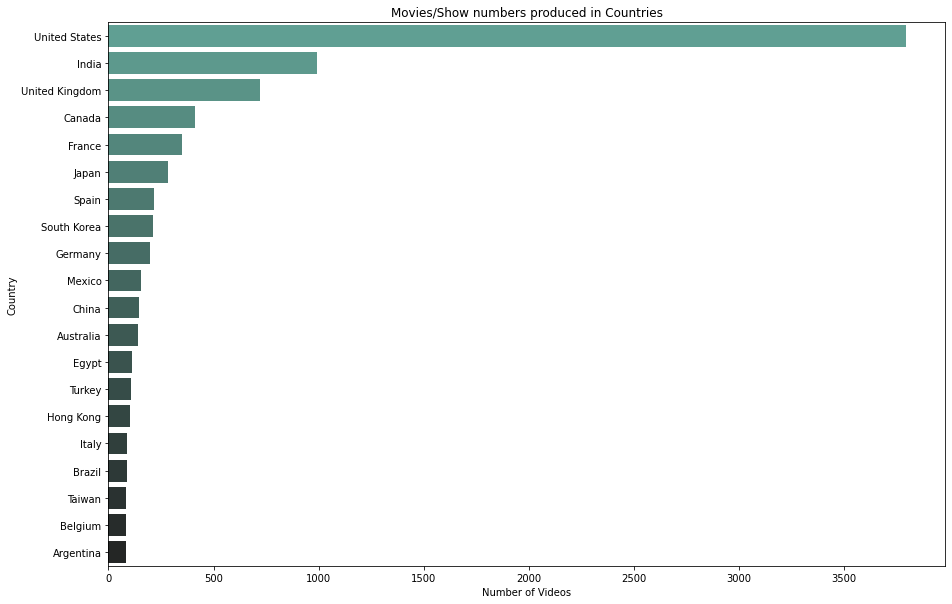

In [35]:
# plot of countries based on content
a = df[df.country != 'unknown'].loc[:,['show_id','title','country', 'listed_in']].copy()
countrylist = (a['country'].to_list())

newlist = []
for country in countrylist:
  if ',' in country:
    a = country.split(', ')
    newlist = newlist + a
  else:
    newlist.append(country)

country_list = pd.DataFrame({'country' : newlist, 'id':np.arange(0,len(newlist),1)})
a = country_list.groupby('country').agg({'id':'count'}).sort_values('id', ascending= False).head(20).reset_index()
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'country', x = 'id',data = a , palette='dark:#5A9_r')
a = plt.title('Movies/Show numbers produced in Countries')
a = plt.ylabel('Country')
a = plt.xlabel('Number of Videos')
top10countries = country_list.groupby('country').agg({'id':'count'}).sort_values('id', ascending= False).head(10).reset_index()['country'].unique()



*   **The majority of the content providers are in the above top-ten countries.**
*   **Among which USA, India, and Uk create more than half of the tv shows and movies on the platform.**





##Different Ratings on the Platform

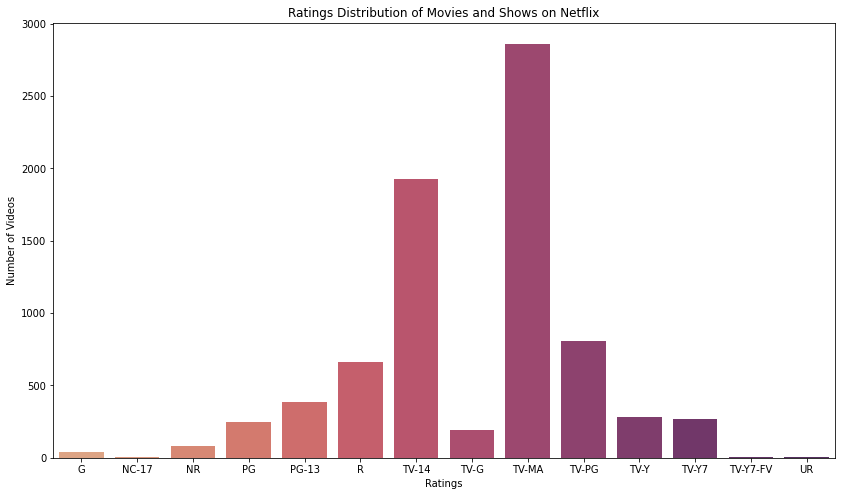

In [36]:
#Plot of rating given in dataset
a = plt.figure(figsize=(14,8))
d = df.groupby('rating').agg({'show_id':'count'}).reset_index()
a = sns.barplot(x= d['rating'], y=d['show_id'], palette='flare')
a = plt.title('Ratings Distribution of Movies and Shows on Netflix')
a = plt.xlabel('Ratings')
a = plt.ylabel('Number of Videos')

**Most content on Netflix is rated for Mature Audiences and over 14 years old**

## Top Genres on the Platform

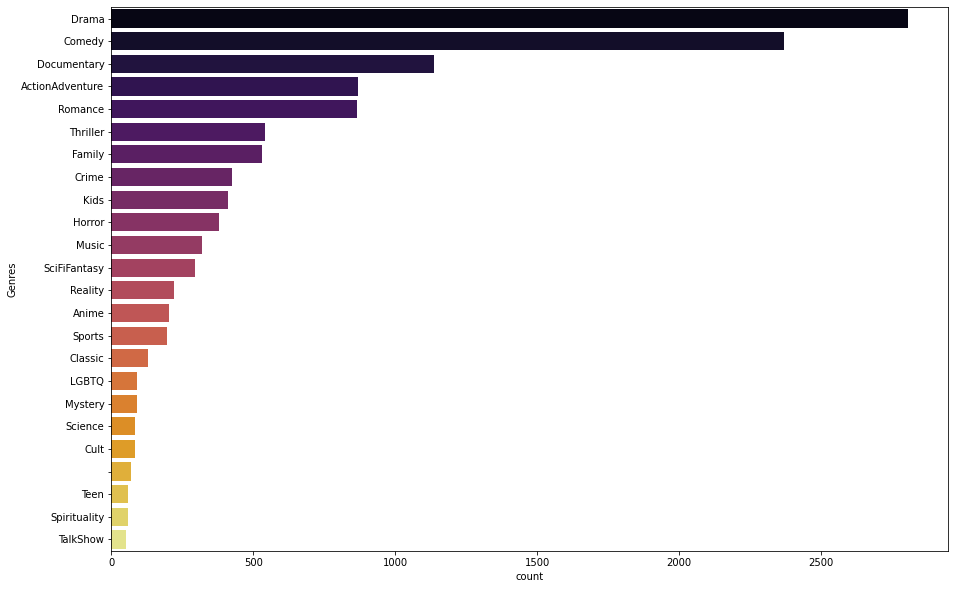

In [37]:
# Plot of Genres
a = df.loc[:,['show_id','title','country', 'Genres']].copy()
a = a.explode('Genres')
genre_list = a.Genres.unique()
group = a.groupby('Genres').agg(count = ('show_id','count')).sort_values('count', ascending= False).reset_index()
plt.figure(figsize=(15,10))
_ = sns.barplot(y = 'Genres', x = 'count',data = group , palette='inferno')

**Top Genres on Netflix are found to be :  Drama, Comedy, Documentary, Action and Adventure, Romance etc.**

##Which directors have most number of the movies and tv shows?

In [38]:
# Replace the null values in director.
df['director']=df['director'].fillna('')

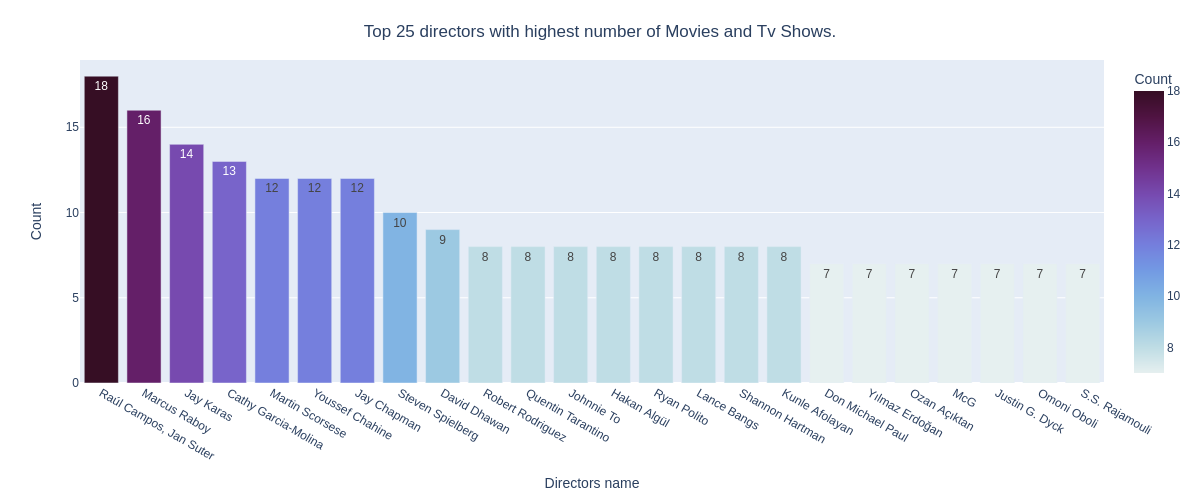

In [39]:
#Plot of directors
directors_list = df.director.value_counts().reset_index().head(25)[1:]  # We will not include the null values.
directors_list.rename(columns={'index':'Directors name', 'director':'Count'}, inplace=True)
fig = px.bar(directors_list, x='Directors name', y='Count', text_auto=True, color='Count', color_continuous_scale= 'dense')

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(title={'text': 'Top 25 directors with highest number of Movies and Tv Shows.','y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'},autosize=False,width=1200,height=500)

fig.show('png')

**Raúl Campos, Jan Suter, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Jay Chapman are the top 5 directors having most numbers of movies and TV shows.**

## Top 10 Actors

In [40]:
# List of all the actors in the dataset
def data2list(data):
# dict to store the count for each actor
  actor_list = {} 
# list to store all the names
  temp_list = []
# define the data we intend to use  
  cast_list = list(data['cast'])  
  for i in range(len(cast_list)):
    temp_list.extend(str(cast_list[i]).split(','))
  for i in temp_list:
    if i not in actor_list:
      actor_list[i] = temp_list.count(i)
  return actor_list

In [41]:
# Dataframe for list of actors.
actor_list = pd.DataFrame([data2list(df)]).T.reset_index()
# dropped the null value in the dataframe which was present at 106th index.
actor_list = actor_list.sort_values(0, ascending=False).drop(106) 

In [42]:
actor_list.head(10)

,index,0
1294,Anupam Kher,38
194,Takahiro Sakurai,28
2203,Om Puri,27
4039,Shah Rukh Khan,27
740,Boman Irani,25
2506,Paresh Rawal,24
8462,Andrea Libman,24
4368,Yuki Kaji,23
4994,Vincent Tong,22
2201,Akshay Kumar,22


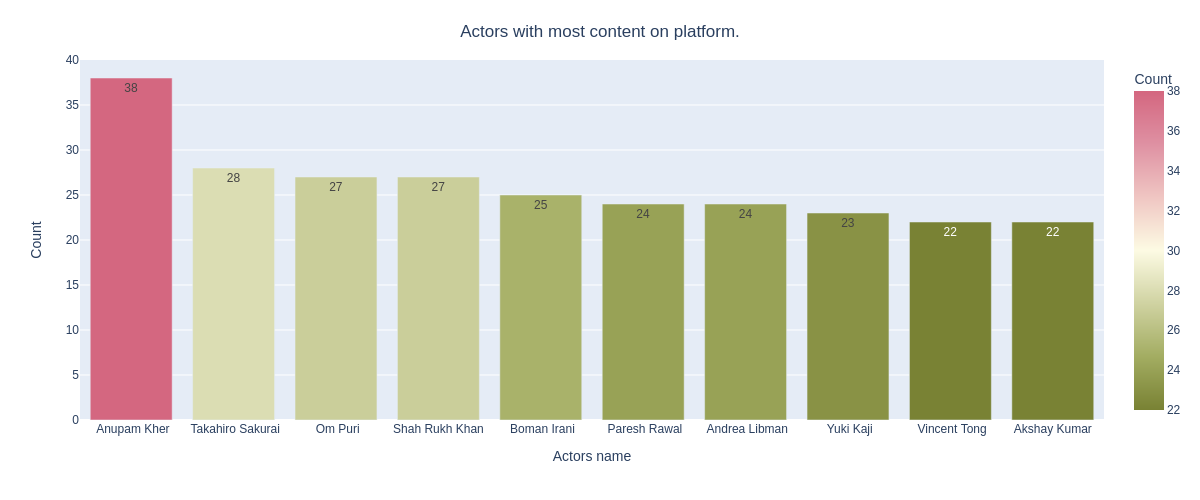

In [43]:
# Plot of top actors
top_10_actors = actor_list.head(10)
top_10_actors.rename(columns={'index':'Actors name', 0:'Count'}, inplace=True)

fig = px.bar(top_10_actors, x='Actors name', y='Count', text_auto=True,
             color='Count', color_continuous_scale='armyrose')

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Actors with most content on platform.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)
# fig.show()
fig.show('png')

**Anupam Kher is the one who appeared in most of the movies and TV Shows**. 

**Also, its good to see that 6 of the actors in the top ten list of most numbers tv shows and movies are from India.**

## **2**. **Understanding what type content is available in different countries**

## Content available in different countries 

In [44]:
# Top 10 countries that produce most of the content
df['country_single'] = df['country'].apply(lambda x: x.split(",")[0])
country_order = df['country_single'].value_counts()[:10].index
countryVScontent = df[['type', 'country_single']].groupby('country_single')['type'].value_counts().unstack().loc[country_order].reset_index()
countryVScontent

type,index,Movie,TV Show
0,United States,2326.0,1053.0
1,India,883.0,73.0
2,United Kingdom,341.0,235.0
3,Canada,175.0,84.0
4,Japan,75.0,160.0
5,France,137.0,59.0
6,South Korea,42.0,152.0
7,Spain,119.0,49.0
8,Mexico,79.0,44.0
9,Australia,56.0,50.0


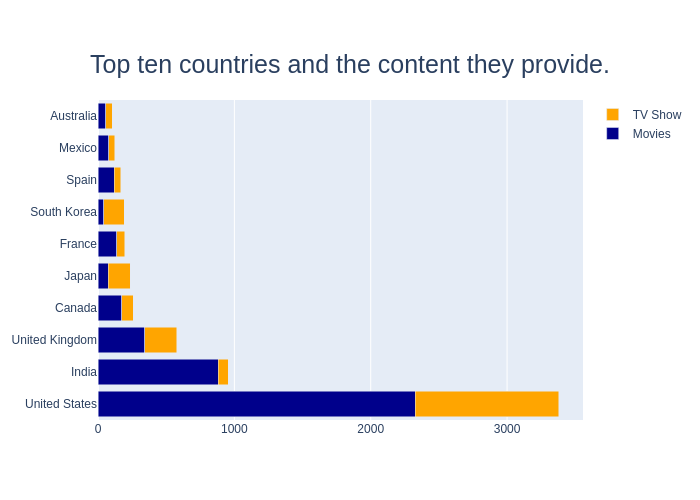

In [45]:
# Plot of the Countries as per Movies and TV shows
fig = go.Figure()
fig.add_trace(go.Bar(y=countryVScontent['index'], x=countryVScontent['Movie'], name='Movies', orientation='h', marker=dict(color='darkblue')))
fig.add_trace(go.Bar(y=countryVScontent['index'], x=countryVScontent['TV Show'], name='TV Show', orientation='h', marker=dict(color='orange')))

fig.update_layout(barmode='stack', title={'text': 'Top ten countries and the content they provide.', 'y':0.89, 'x':0.5, 'font_size':25, 'xanchor': 'center', 'yanchor': 'top'})

fig.show('png')

**The United States is a leading producer of both types of content which is obvious as Netflix is US Based company.** 

**It is followed by India where most of the content is in the form of movies.**


##Content produced in top 10 countries

In [46]:
a = df[df['country'] != 'unknown country'].loc[:,['show_id','title','country','listed_in','Genres']].copy()

In [47]:
#function to convert string type to list 
def operation(row,string):
  return row[string].split(', ')
a['listed_in'] = a.apply(lambda x: operation(x,'listed_in'), axis = 1)
a['country'] = a.apply(lambda x: operation(x,'country'), axis = 1)

In [48]:
#explodes the list of categories and genres in each row to individual rows
a = a.explode('Genres').explode('country')

In [49]:
a = a.groupby(['country','Genres']).agg({'show_id':'count'}).reset_index() #table contains number of videos belonging to each genre from different countries

In [51]:
top15genres = group.head(15)['Genres'].to_list()

In [52]:
#function to return the indeces that contain the top10 countries with the top 10 genres viewed
def selectindex(row, attribute, list):
  b = row[attribute]
  boolean = b in list
  return boolean

index = a.apply(lambda x: selectindex(x, 'country',top10countries), axis = 1)
newindex = a[index].apply(lambda x: selectindex(x, 'Genres',top15genres), axis = 1)

In [54]:
newdata = a[index][newindex] #data that contains the number videos in the top 15 genres in the top 10 countries

In [55]:
gyr = ['#ff00ff','#00bfff',
 '#7f0000','#483d8b','#f0e68c','#b03060','#ff7f50','#00ff00',
 '#ee82ee','#00ffff','#1e90ff','#9acd32','#00fa9a','#ffb6c1',
 '#8b008b','#b8860b','#00008b','#ffd700','#008000','#008b8b','#e0ffff',
 '#000000','#ff0000','#0000ff','#556b2f']

Text(0, 0.5, 'NUMBER OF SHOWS & MOVIES')

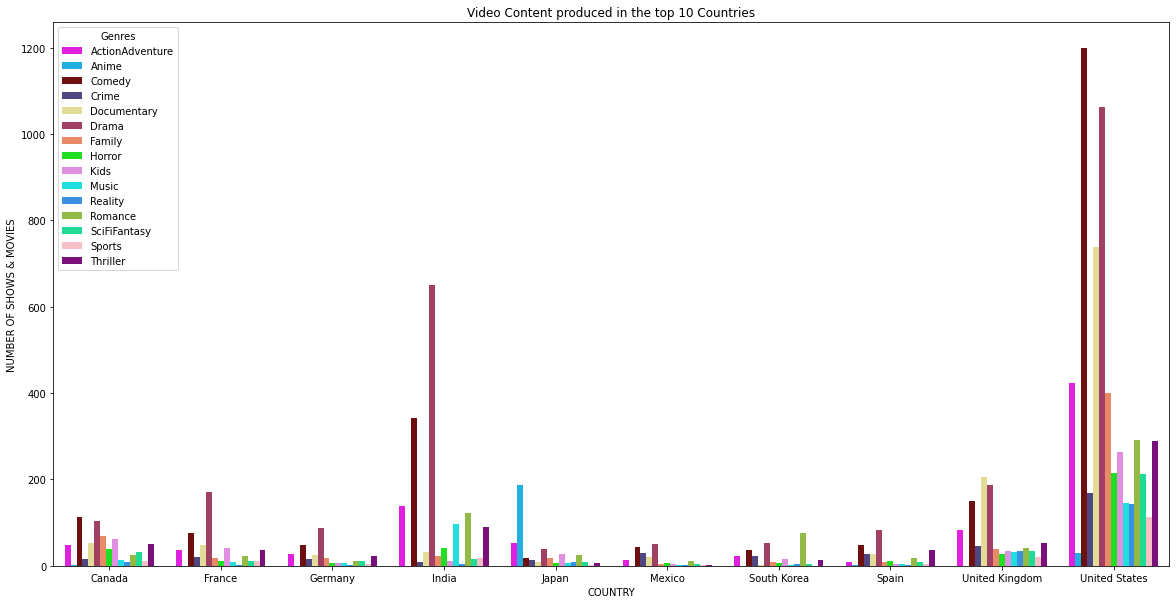

In [56]:
a = plt.figure(figsize=(20,10))
sns.barplot(x = newdata['country'], y = newdata['show_id'], hue = newdata['Genres'], palette= sns.color_palette(gyr[:23]) )
plt.title('Video Content produced in the top 10 Countries')
plt.xlabel('COUNTRY')
plt.ylabel('NUMBER OF SHOWS & MOVIES')





*  **Drama is the most produced genre in a lot of Non-English speaking countries**
*   **Comedy is the most produced genre in English speaking countries like United States of America and United Kingdom and Canada**


*  **Japan is the biggest producer of Anime. Anime is also the most produced in genre in Japan**
*  **Most South Korean content are from the Romance genre**


*   **Documentaries are mainly produced in United Kingdom and United States of America**
*   **Drama and Comedy are the most produced genres in the top countries with exceptions of Japan and South Korea**







##**3**. **Is Netflix has increasingly focusing on TV rather than movies in recent years**.

In [57]:
content = df.loc[:,['title','date_added','release_year', 'duration', 'type']].dropna().copy()

In [58]:
content['date_added'] = content['date_added'].dt.year

In [59]:
#Assuming TV shows release new seasons every year, adding a duplicate of the show for each season.
def season(row):
  release = row['release_year']
  added = row['date_added']

  if row['type'] =='TV Show':
    seasons = int(row['duration'][0])
    b = []
    for i in range(1, seasons+1):
      if i ==1:
        b.append(release)
      else:
        b.append(b[-1]-1)
    a = b
  else:
    a = []
    a.append(row['release_year'])      
  
  return a

content['Released Years'] = content.apply(lambda x: season(x),axis=1)

In [60]:
compare = content.explode('Released Years')

In [61]:
tv = compare[compare['type'] == 'TV Show'].groupby(['date_added']).agg(count = ('title','count')).reset_index()
tv['type'] = 'TV'
movie = compare[compare['type'] != 'TV Show'].groupby(['date_added']).agg(count = ('title','count')).reset_index()
movie['type'] = 'Movie'

In [62]:
data = pd.concat([tv, movie], axis = 0)

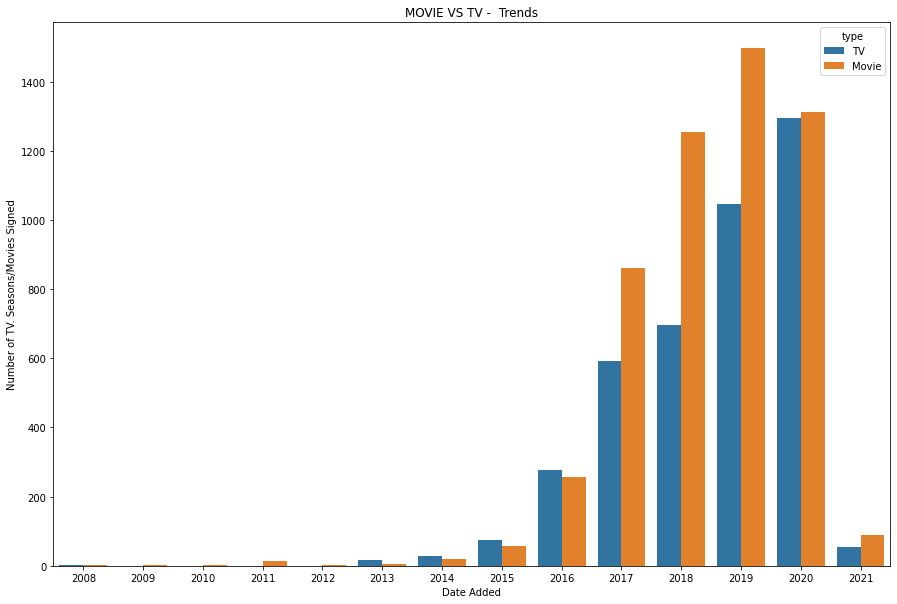

In [63]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'date_added', y='count', hue = 'type', data = data)
plt.title('MOVIE VS TV -  Trends')
plt.xlabel('Date Added')
_ = plt.ylabel('Number of TV. Seasons/Movies Signed')

**We can observe that TV shows signed have been higher than movies in 2016.** 

**While the no of movies signed were higher, it can be seen that the TV shows signed per year is catching up with the movies signed year by year.**

##Data Preprocessing

## Using text columns to create clusters for our data

In [64]:
cluster_df = df[['title']]
cluster_df['cluster_data'] = (df['description'] + ' ' + df['listed_in'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['rating']).astype(str)
cluster_df.set_index('title', inplace = True)
cluster_df.head()
cluster_df.head()

,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalyptic world, rag-doll robots hi..."
21,A brilliant group of students become card-coun...


##PUNCTUATION REMOVAL

In [65]:
# Punctuation removal
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)
cluster_df.head(2)

,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...


##STOPWORDS REMOVAL

In [66]:
#library for stopwords removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
stop_words = set(stopwords.words('english'))

In [68]:
# Stopwords removal
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)
cluster_df.cluster_data.head(2)

title
3%      future elite inhabit island paradise far crowd...
7:19    devastating earthquake hits mexico city trappe...
Name: cluster_data, dtype: object

##STEMMING

In [69]:
# Stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [70]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stemming)
cluster_df.head(2)

,cluster_data
title,
3%,futur elit inhabit island paradis far crowd sl...
7:19,devast earthquak hit mexico citi trap survivor...


In [71]:
bag_of_words = cluster_df.cluster_data

##TF-IDF

In [72]:
#Word to vector
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(bag_of_words)
print(X.shape)

(7770, 20000)


In [73]:
t_vectorizer.get_feature_names_out()

array(['007', '10', '100', ..., 'ştar', 'şçil', 'şükrü'], dtype=object)

##Dimensionality reduction using PCA

In [74]:
#Intializaling and fitting PCA
pca = PCA()
pca.fit(X.toarray())

PCA()

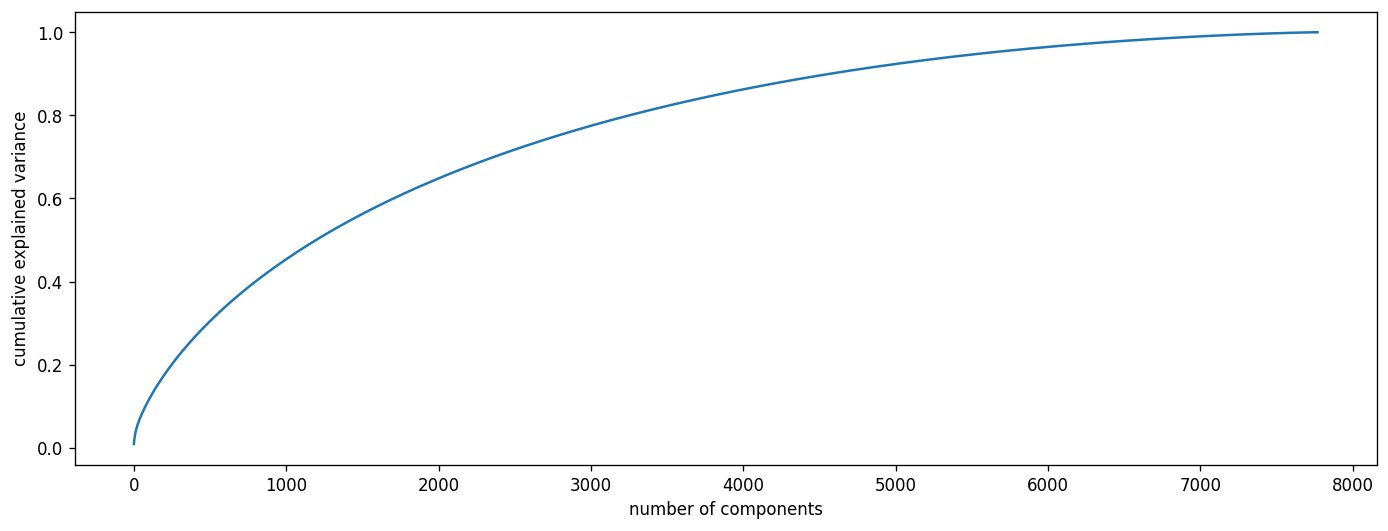

In [75]:
# Scree Plot of PCA
plt.figure(figsize=(14,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**We can see from the above plot almost 95% of the variance can be explained by 5000 components.**

**Since choosing 5000 could be tricky we will set the value to be 95%.**

In [76]:
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X.toarray())
X_transformed = pca_tuned.transform(X.toarray())
X_transformed.shape

(7770, 5591)

In [77]:
X_transformed

array([[ 0.12381384,  0.01878768, -0.01985089, ..., -0.01290126,
        -0.0061675 ,  0.00134415],
       [-0.03957416,  0.03685093, -0.00068804, ...,  0.01741727,
        -0.00170697,  0.00722743],
       [-0.04426074,  0.04240966, -0.03652511, ...,  0.00155654,
         0.00456558, -0.00629564],
       ...,
       [-0.08081921, -0.0809065 ,  0.27382203, ...,  0.00364216,
        -0.00489299,  0.01251322],
       [ 0.10148378, -0.00405508,  0.01560673, ..., -0.00551716,
        -0.01236381,  0.01055393],
       [-0.09251356, -0.20593119,  0.35063681, ..., -0.00786756,
         0.00438817,  0.00044112]])

## Optimum K value using Metric:Silhouette.

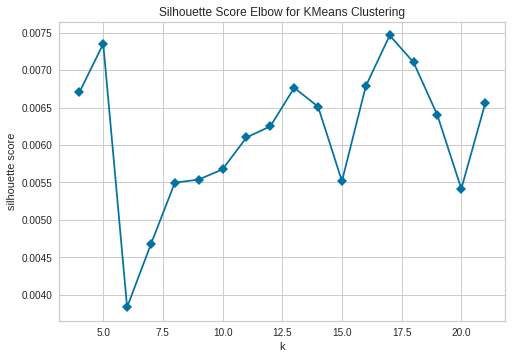

In [78]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=(4,22), metric='silhouette', timings=False, locate_elbow=False)

visualizer.fit(X_transformed)
visualizer.show()

In [79]:
from yellowbrick.cluster import SilhouetteVisualizer

In [80]:
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)
      # Fit the training data to the visualizer
      visualizer.fit(X_transformed) 
      # prove the data
      visualizer.poof()

For n_clusters = 2, silhouette score is 0.0047721176143510746


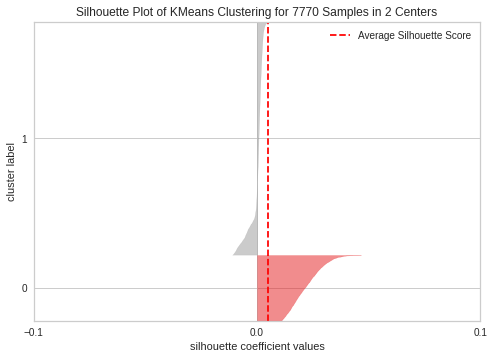

For n_clusters = 3, silhouette score is 0.005919120526288965


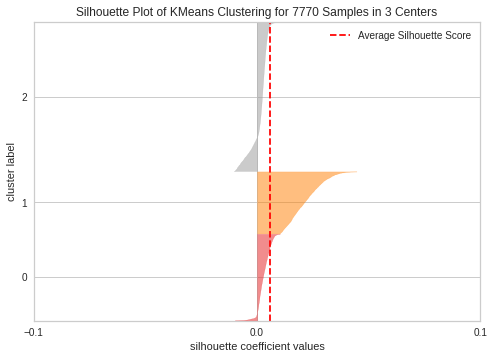

For n_clusters = 4, silhouette score is 0.00670274740576397


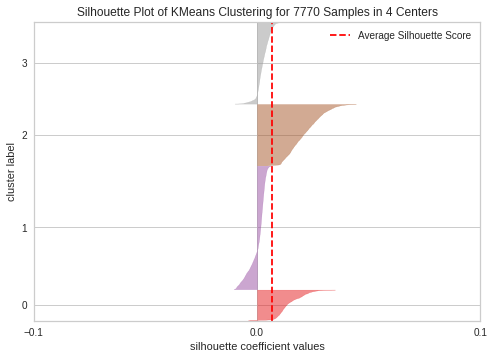

For n_clusters = 5, silhouette score is 0.007350213894115626


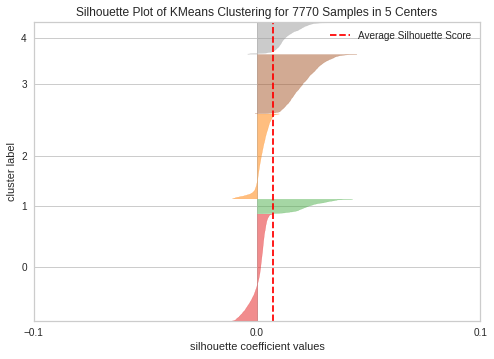

For n_clusters = 6, silhouette score is 0.003833635359469857


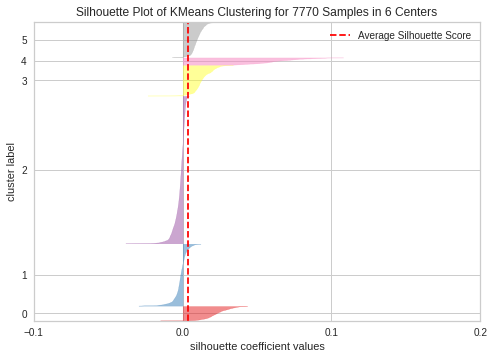

For n_clusters = 7, silhouette score is 0.00467803783104266


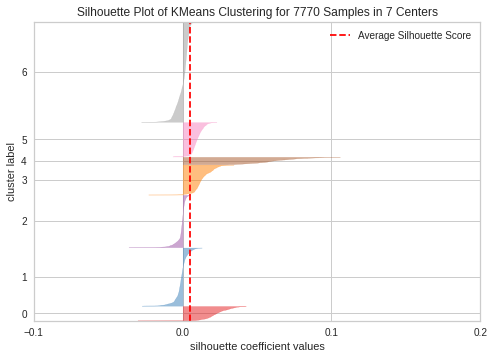

For n_clusters = 8, silhouette score is 0.00549681474120132


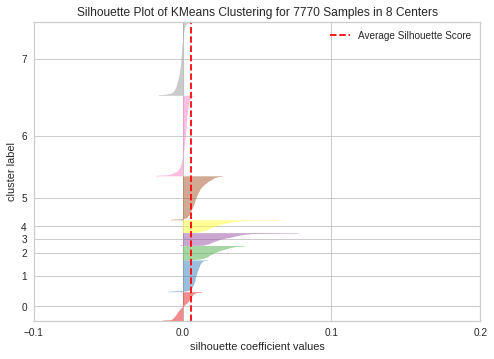

For n_clusters = 9, silhouette score is 0.005538054493019302


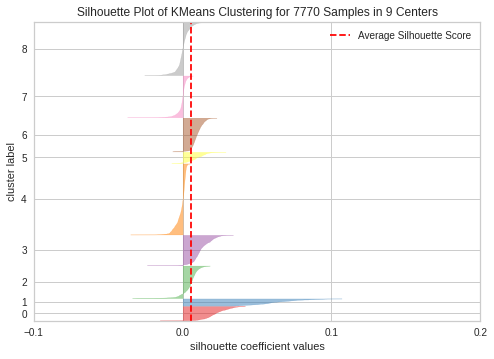

For n_clusters = 10, silhouette score is 0.005675363522968466


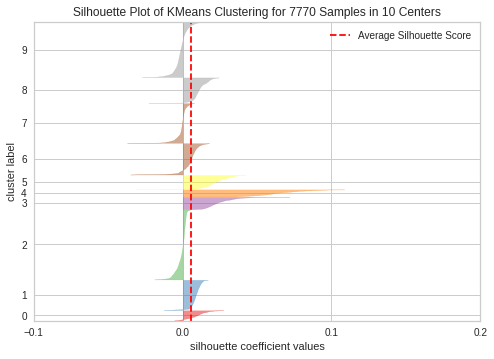

For n_clusters = 11, silhouette score is 0.006100011712560611


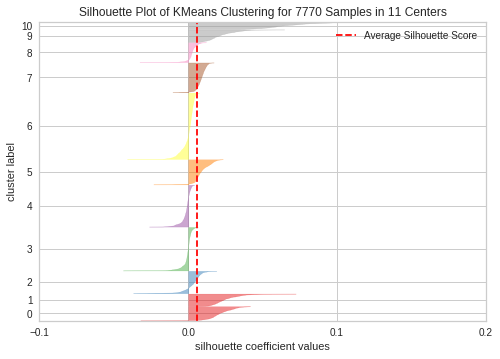

For n_clusters = 12, silhouette score is 0.006249400404526546


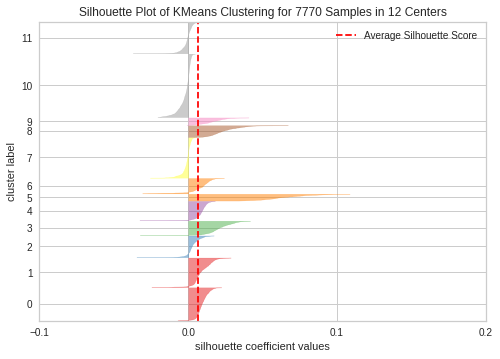

For n_clusters = 13, silhouette score is 0.006763514456040729


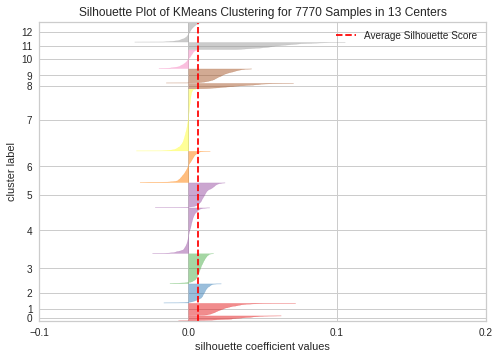

For n_clusters = 14, silhouette score is 0.006511523549925806


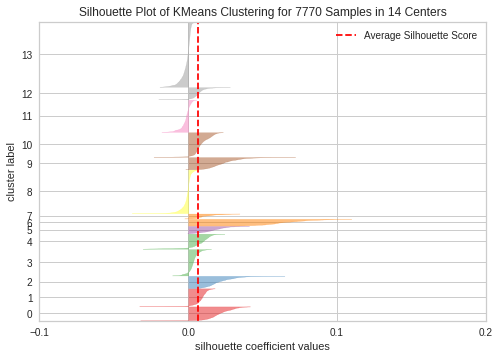

For n_clusters = 15, silhouette score is 0.005516143087294644


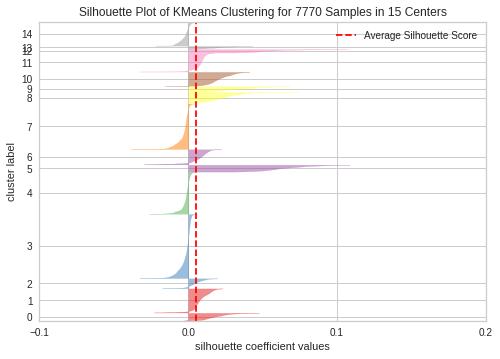

For n_clusters = 16, silhouette score is 0.006786074313056253


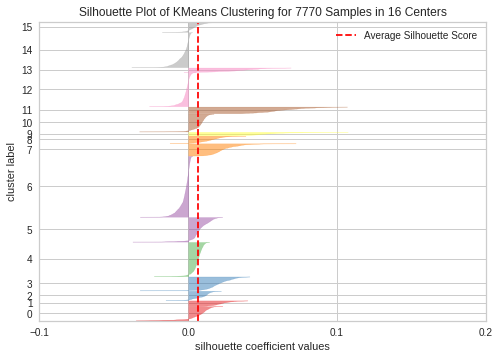

For n_clusters = 17, silhouette score is 0.007462935859315744


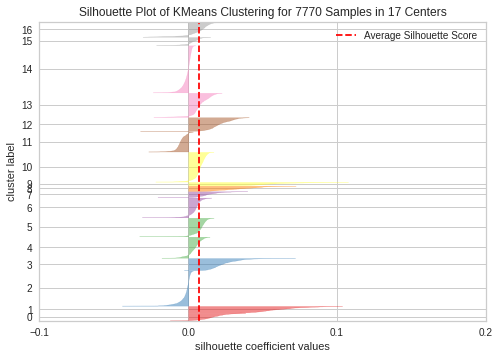

For n_clusters = 18, silhouette score is 0.0071030398309007165


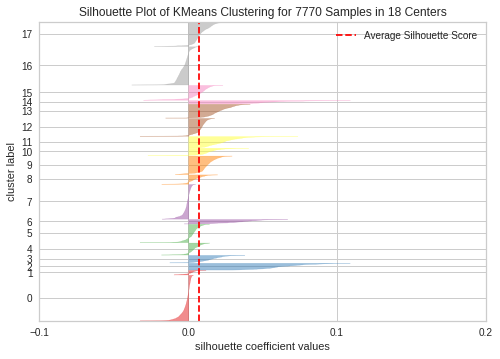

For n_clusters = 19, silhouette score is 0.006396283888182606


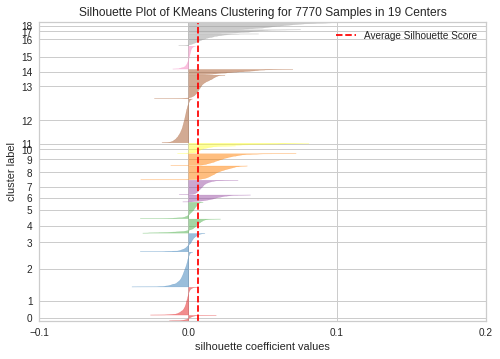

For n_clusters = 20, silhouette score is 0.005414776619067895


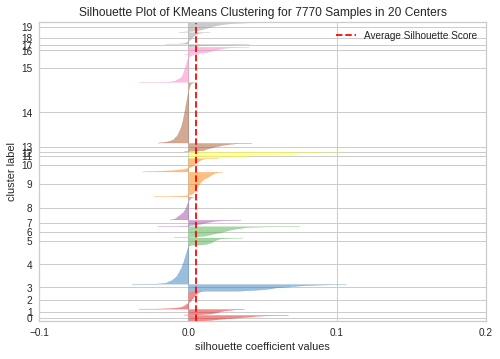

For n_clusters = 21, silhouette score is 0.0065541615624685


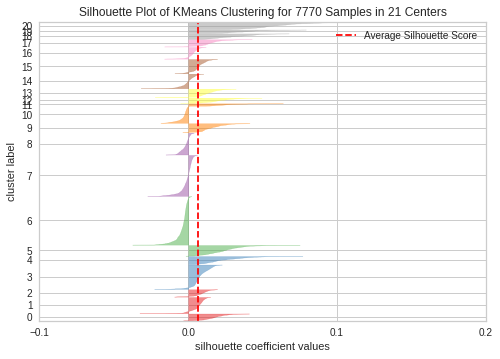

In [82]:
silhouette_score_analysis(22)

##Elbow method to find optimum k value:

In [ ]:
plt.figure(figsize=(10,6), dpi=120)
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##Clustering considering k=10


In [ ]:
plt.figure(figsize=(10,6), dpi=120)

kmeans= KMeans(n_clusters=10, init= 'k-means++', random_state=9)
kmeans.fit(X_transformed)

#predict the labels of clusters.
label = kmeans.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
# Add cluster values to the dateframe
df['cluster_number'] = kmeans.labels_

In [ ]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#word cloud for user rating review
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = df[['cluster_number',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster: {i}')
  plt.axis("off")
  plt.show()

In [ ]:
for i in range(10):
  func_select_Category(i,'listed_in')

##Get Recommendations

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
t_vectorizer = TfidfVectorizer()
count_matrix= t_vectorizer.fit_transform(bag_of_words)

In [ ]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

In [ ]:
indices = pd.Series(cluster_df.index)
indices[:5]

In [ ]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(Title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(cluster_df.index)[i])
        
    return recommended_movies

In [ ]:
#Recommendations for Movies
movie_recommendations = pd.DataFrame(recommendations('Bad Boys'), columns=['Recommendations'])
movie_recommendations.head(11)

In [ ]:
# Recommendations for Tv-Shows
tvshows_recommendations = pd.DataFrame(recommendations('13 Reasons Why'), columns=['Recommendations'])
tvshows_recommendations.head(11)

In [ ]:
# Let's import sch
import scipy.cluster.hierarchy as sch
hier_ward_euc = sch.linkage(X_transformed, method = 'ward', metric = 'euclidean')

In [ ]:
plt.figure(figsize=(20,15))
dendrogram = sch.dendrogram(hier_ward_euc)
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [83]:
from sklearn.cluster import KMeans , AgglomerativeClustering, DBSCAN

In [ ]:
clusters = []
scores = []
distances = []
for i in np.arange(5,75,5):
  hc = AgglomerativeClustering(n_clusters = None, distance_threshold = i, affinity = 'euclidean', linkage = 'ward')
  y_hc = hc.fit_predict(X_transformed)
  clusters.append(hc.labels_.max()+1)
  if (hc.labels_.max()+1 >=2) :
    scores.append(silhouette_score(X_transformed, y_hc))
  else:
    scores.append(1)
  distances.append(i)

hierarchical = pd.DataFrame({'Clusters': clusters, 
                             'Silhouette Scores': scores,
                             'Distance': distances})

In [ ]:
hierarchical.sort_values('Silhouette Scores', ascending = False).head()

##**CONCLUSIONS** :

## 1 . Exploratory Data Analysis



*   **Majority of content avaiable on Netflix is Movies.**
*   **Growth in the number of movies on Netflix is much higher than tv shows**.**The highest number of movies and tv shows got added in 2019 and 2020**


*   **October, November, December, and January are months in which many shows and movies get uploaded to the platform**.
*   **Most of the content gets uploaded in the beginning and the middle of the month**.



*   **United States and India are the top countries that produce all of the available content on the platform**.
*   **TV-MA tops the charts, indicating that mature content is more popular on Netflix**




*   **Top Genres on Netflix are found to be : Drama, Comedy, Documentary, Action and Adventure, Romance etc**.
*   






##2. Analysis of Content produced in different countries



*   **The United States is a leading producer of both types of content which is obvious as Netflix is US Based company**. **It is followed by India where most of the content is in the form of movies**



*   **Drama is the most produced genre in a lot of Non-English speaking countries**
*   **Comedy is the most produced genre in English speaking countries like United States of America, United Kingdom and Canada**


*   **Drama and Comedy are the most produced genres in the top countries with exceptions of Japan and South Korea**
*   **Japan is the biggest producer of Anime. Anime is also the most produced in genre in Japan**






##3. Is Netflix has increasingly focusing on TV rather than movies in recent years.



*   **We have observed that TV shows signed have been higher than movies in 2016**.


*   **While the no of movies signed were higher, it can be seen that the TV shows signed per year is catching up with the movies signed year by year**.



## Clustering 



*   **k=10 was found to be an optimal value for clusters using which we grouped our data into 10 distinct clusters.**
*   **Using the given data a simple recommender system was created using cosine_similarity and recommendations for Movies and Tv Shows were obtained**.

